Hello everyone! My name is Ali Tout and in this dataset I'm going to be focused on 2 different subjects. First I am going to look at deaths around the world due to specific issues such as violence and infectious disease. Next, I am going to focus on chronic diseases and violence in America to see if there is any common trend within the data. Thank you for taking your time to read this notebook and I hope you have a great day!

NOTE: This data only goes up to 2019 as the Kaggle Poster mentions so variables like COVID will not be involved. I am only going to look at data in the 2000's and higher since data collection before then was nowhere near as effecient and many poorer countries have 0 for deaths by particular diseases like AIDS even though this is obviously not true.

# Data Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
from plotly.offline import plot, iplot
import plotly.express as px

In [3]:
df = pd.read_csv('annual_deaths.csv')
df.head()

,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,2007,15,2933.0,15925.0,481.0,393.0,2127.0,3657.0,...,2439.0,1199.0,53962.0,4490.0,7222.0,3346.0,6458.0,3437.0,1402.0,450.0
1,Afghanistan,AFG,2008,17,2731.0,16148.0,462.0,255.0,1973.0,3785.0,...,2231.0,1092.0,54051.0,4534.0,7143.0,3316.0,6408.0,3005.0,1424.0,455.0
2,Afghanistan,AFG,2009,0,2460.0,16383.0,448.0,239.0,1852.0,3874.0,...,1998.0,1065.0,53964.0,4597.0,7045.0,3291.0,6358.0,2663.0,1449.0,460.0
3,Afghanistan,AFG,2011,2,2327.0,17094.0,448.0,390.0,1775.0,4170.0,...,1805.0,1525.0,54347.0,4785.0,6916.0,3318.0,6370.0,2365.0,1508.0,473.0
4,Afghanistan,AFG,2012,14,2254.0,17522.0,445.0,94.0,1716.0,4245.0,...,1667.0,3521.0,54868.0,4846.0,6878.0,3353.0,6398.0,2264.0,1544.0,482.0


First I'm just going to make the columns a bit more readable by reducing the amount of words in them. We can assume that when we talk about deaths we are referring to both sexes and all ages.

In [4]:
df.columns[4].split(' - Sex')[0]

'Deaths - Meningitis'

In [5]:
def col_change(col):
    if('Sex' in col):
        new_col = col.split(' - Sex')[0]
        return new_col
    return col
df.columns = np.vectorize(col_change)(df.columns)

First Let's clean our data a bit so that we don't have to deal with null values

In [6]:
df.isnull().sum()

Entity                                                    0
Code                                                   2048
Year                                                      0
Number of executions (Amnesty International)           7987
Deaths - Meningitis                                     244
Deaths - Neoplasms                                      244
Deaths - Fire, heat, and hot substances                 244
Deaths - Malaria                                        244
Deaths - Drowning                                       244
Deaths - Interpersonal violence                         244
Deaths - HIV/AIDS                                       244
Deaths - Drug use disorders                             244
Deaths - Tuberculosis                                   244
Deaths - Road injuries                                  244
Deaths - Maternal disorders                             244
Deaths - Lower respiratory infections                   244
Deaths - Neonatal disorders             

Looking at this it seems: 
- Countries ISO Codes are missing a lot of values, we can just delete this column since it won't be needed in our analysis.
- Number of executions is missing most of its values, we can delete this column as well since with most values gone, we can't make any conclusions
- Terrorism is also missing most of its data. I won't delete this column as it can still be useful but we have to be careful considering many countries are missing data on it.
- All the deaths (excpet terrorism) have exactly 244 missing values, most likely these missing values are the same as well. Let's see if we can find if it's missing for some specific place

In [7]:
df = df.drop(['Code', 'Number of executions (Amnesty International)'], axis = 1)

In [8]:
df[df['Deaths - Meningitis'].isnull()]['Entity'].equals(df[df['Deaths - Road injuries'].isnull()]['Entity'])

True

As assumed, it seems that all the NAN values for deaths reside in the same places. Let's just drop the columns where the deaths are missing then.

In [9]:
df = df.dropna(subset = ['Deaths - Meningitis'])

One thing that kind of concerns me are values which have 0 for deaths by something. I highly doubt that any country has 0 deaths for HIV or Drug use. Let's take a closer look at this data.

In [10]:
df[df['Deaths - Drug use disorders'] < 20]

,Entity,Year,Deaths - Meningitis,Deaths - Neoplasms,"Deaths - Fire, heat, and hot substances",Deaths - Malaria,Deaths - Drowning,Deaths - Interpersonal violence,Deaths - HIV/AIDS,Deaths - Drug use disorders,...,Deaths - Protein-energy malnutrition,Terrorism (deaths),Deaths - Cardiovascular diseases,Deaths - Chronic kidney disease,Deaths - Chronic respiratory diseases,Deaths - Cirrhosis and other chronic liver diseases,Deaths - Digestive diseases,Deaths - Acute hepatitis,Deaths - Alzheimer's disease and other dementias,Deaths - Parkinson's disease
120,Albania,1990,107.0,2616.0,31.0,0.0,147.0,177.0,1.0,5.0,...,35.0,0.0,6701.0,241.0,1006.0,326.0,648.0,4.0,360.0,93.0
121,Albania,1991,112.0,2698.0,34.0,0.0,160.0,207.0,1.0,7.0,...,40.0,0.0,6903.0,246.0,1009.0,330.0,662.0,3.0,363.0,96.0
122,Albania,1992,108.0,2642.0,35.0,0.0,154.0,232.0,1.0,7.0,...,42.0,1.0,6699.0,233.0,967.0,318.0,644.0,3.0,365.0,94.0
123,Albania,1993,102.0,2586.0,33.0,0.0,148.0,258.0,2.0,10.0,...,44.0,NaN,6480.0,222.0,922.0,307.0,621.0,3.0,368.0,92.0
124,Albania,1994,93.0,2493.0,30.0,0.0,144.0,286.0,2.0,15.0,...,44.0,1.0,6191.0,209.0,855.0,287.0,577.0,2.0,373.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8196,Zambia,1992,4878.0,4957.0,317.0,8724.0,475.0,523.0,22862.0,15.0,...,4094.0,NaN,8508.0,1031.0,1665.0,2533.0,3815.0,279.0,297.0,94.0
8197,Zambia,1993,3903.0,5075.0,315.0,8795.0,475.0,554.0,28690.0,16.0,...,4040.0,NaN,8783.0,1064.0,1700.0,2602.0,3917.0,286.0,301.0,97.0
8198,Zambia,1994,3837.0,5220.0,315.0,8967.0,457.0,592.0,34628.0,17.0,...,3979.0,NaN,9092.0,1101.0,1739.0,2688.0,4038.0,294.0,306.0,99.0
8199,Zambia,1995,3815.0,5361.0,314.0,9120.0,452.0,632.0,40377.0,18.0,...,3898.0,0.0,9397.0,1137.0,1776.0,2780.0,4167.0,302.0,312.0,102.0


In [11]:
df[df['Deaths - Drug use disorders'] < 20]['Entity'].value_counts()

Liberia                 30
Luxembourg              30
Montenegro              30
Monaco                  30
Micronesia (country)    30
                        ..
Azerbaijan               2
Cameroon                 2
Mozambique               1
Bolivia                  1
Angola                   1
Name: Entity, Length: 121, dtype: int64

It seems that many of these values come from back in the 1990's where data collection was most definetely nowhere near as accurate as it is now. Sadly there is not much I can do to change it, however, I will for the most part be looking at results from the 2000's and ahead to get more accurate information.

One more thing before we start. Some of the countries in the list are not actually countries and are either continents or something else such as Americas. I don't want these values as they encompass multiple countries and are not what's needed.

In [12]:
import pycountry as cy
names = []
for x in cy.countries:
    names.append(x.name)

names.extend(['Venezuela', 'Bolivia', "Cote d'Ivoire", 'Democratic Republic of Congo', 'Tanzania', 'Iran', 'Syria', 'Russia', 'Vietnam', 'North Korea', 'South Korea', 'Laos', 'Taiwan', 'Djibouti'])
df = df[df['Entity'].isin(names)]

# Part 1: Deaths around the World

Alright! Now let's start with some data visualization. Let's start by looking at death due to human activity such as violence and drugs in 2019.

We can first focus on violence related deaths

In [13]:
viol = df[['Year', 'Entity','Deaths - Interpersonal violence']]
viol.head()

,Year,Entity,Deaths - Interpersonal violence
0,2007,Afghanistan,3657.0
1,2008,Afghanistan,3785.0
2,2009,Afghanistan,3874.0
3,2011,Afghanistan,4170.0
4,2012,Afghanistan,4245.0


In [14]:
px.choropleth(data_frame = viol[viol['Year'] == 2019], locations = 'Entity', locationmode = 'country names', color = 'Deaths - Interpersonal violence', color_continuous_scale=px.colors.sequential.Plasma)

I find it interesting to see how first world countries such as United States and Russia more than 17,000 deaths due to interpersonal violence while other third world countries have significantly less. Now for third world countries we can easily give the reasoning that there are nowehere near the amount of ways to report interpersonal violence and many go unnoticed. However, compared to other countries like Canada and Australia, US still has significantly more deaths by violence. 

To be fair though, US and Russia have significantly bigger populations but for such powerful countries, it's worrying to see how much violence there is within them.

Besides those countries, 3 countries that really stand out are Mexico, Brazil, and India with all of them having at least 30,000 deaths by violence.

In [15]:
drugs = df[['Entity', 'Year', 'Deaths - Drug use disorders', 'Deaths - Alcohol use disorders']]
drugs.head()

,Entity,Year,Deaths - Drug use disorders,Deaths - Alcohol use disorders
0,Afghanistan,2007,252.0,111.0
1,Afghanistan,2008,261.0,114.0
2,Afghanistan,2009,270.0,115.0
3,Afghanistan,2011,292.0,120.0
4,Afghanistan,2012,305.0,123.0


I'm unsure if death by drug use disorders include those of alcohol or not, we can check this by comparing if at any point deaths by alcohol use is greater than deaths by drug use.

In [16]:
all(drugs['Deaths - Drug use disorders'] > drugs['Deaths - Alcohol use disorders'])

False

In [17]:
drugs[drugs['Deaths - Drug use disorders'] < drugs['Deaths - Alcohol use disorders']]

,Entity,Year,Deaths - Drug use disorders,Deaths - Alcohol use disorders
120,Albania,1990,5.0,10.0
121,Albania,1991,7.0,11.0
122,Albania,1992,7.0,11.0
123,Albania,1993,10.0,11.0
211,American Samoa,1991,0.0,1.0
...,...,...,...,...
8219,Zambia,2015,47.0,116.0
8220,Zambia,2016,50.0,120.0
8221,Zambia,2017,54.0,126.0
8222,Zambia,2018,57.0,132.0


Okay so they do seem to be different disorders. In that case we will graph death by drug use disorders and deaths by alcohol use disorders separately for 2019.

In [18]:
px.choropleth(data_frame = drugs[drugs['Year'] == 2019], locations = 'Entity', locationmode = 'country names', color = 'Deaths - Drug use disorders', color_continuous_scale=px.colors.sequential.Plasma)

In [19]:
px.choropleth(data_frame = drugs[drugs['Year'] == 2019], locations = 'Entity', locationmode = 'country names', color = 'Deaths - Alcohol use disorders', color_continuous_scale=px.colors.sequential.Plasma)

Wow so again we see the United States and Russia stand out this time for deaths due to drug and alcohol. What's very interesting to notice is that actually most of the countries that stood out in violence also stood out in substance abuse. This makes sense considering drug abuse and violence are fairly correlated.

It's kind of disheartening to see such powerful countries still having so many problems within itself.

Alright now that we've analyzed violence and drugs let's move onto infectious diseases.

In [20]:
menin = df[['Entity', 'Year', 'Deaths - Meningitis']]
menin.head()

,Entity,Year,Deaths - Meningitis
0,Afghanistan,2007,2933.0
1,Afghanistan,2008,2731.0
2,Afghanistan,2009,2460.0
3,Afghanistan,2011,2327.0
4,Afghanistan,2012,2254.0


In [21]:
px.choropleth(data_frame = menin[menin['Year'] == 2019], locations = 'Entity', locationmode = 'country names', color = 'Deaths - Meningitis', color_continuous_scale=px.colors.sequential.Plasma)

Nothing too surprising. Most of these infectious diseases lie in places like Africa, India, and China. Let's take a closer look at Africa and see how it has progressed for the last 19 years to see if cases of Mengitis have decreased.

In [22]:
df_menin = menin.sort_values(by = 'Year')
df_menin = df_menin[df['Deaths - Meningitis'] < 60000]
plot(px.choropleth(data_frame = df_menin, locations = 'Entity', locationmode = 'country names', scope = 'africa', color = 'Deaths - Meningitis', color_continuous_scale=px.colors.sequential.Plasma, animation_frame='Year', range_color=[0, 60000]))

<ipython-input-22-e1019133eff5>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



'temp-plot.html'

It seems that there has been some good progress in terms of reducing Meningitis in Africa for most countries. The main one is Ethiopia which went from around 27,000 cases to 12,000! Some other countries have also decreased the amount of cases by a couple hundreds or thousands compared to what they used to be at.

Howeverk, there are some exceptions and a notable one is Nigeria which back in the 1900's was sitting at around 42,000 cases but is now at 44,000 cases. Others such as Chad have also either increased or remained stable.

All in all, Meningitis is still very much a work in progress and while it has been reduced for the most part, it still flows in places like Ethiopia and Nigeria while keeping itself near stable in most other countries.

Let's take a look at other infectious diseases now like Lower Respiratory Infections

In [23]:
resp = df[['Entity', 'Year', 'Deaths - Lower respiratory infections']]
#resp.sort_values(by = 'Year')
resp.head()

,Entity,Year,Deaths - Lower respiratory infections
0,Afghanistan,2007,27672.0
1,Afghanistan,2008,25800.0
2,Afghanistan,2009,24340.0
3,Afghanistan,2011,22883.0
4,Afghanistan,2012,22162.0


In [24]:
plot(px.choropleth(data_frame = resp.sort_values(by = 'Year'), locations = 'Entity', locationmode = 'country names', color = 'Deaths - Lower respiratory infections', color_continuous_scale=px.colors.sequential.Plasma, animation_frame='Year'))

'temp-plot.html'

It's worrying to see how many countries have started having even more deaths by lower respiratory infections. Sadly most of these viruses are just the common flu virus and while we do have preventative measures, we have no cures, allowing these viruses to be rampant throughout most countries.

2 Countries that have had very good progress though are China and India which started out with high cases and decreased significantly. However, there numbers are still some of the highest around the world. 

Most of these deaths are either among older populations or very young populations. Pneumonia is the leading cause of death for children under 5 years old and risk is increased by high pollution or smoking which explains why the infections have a big presence in the West, India, and China.
Cite: https://ourworldindata.org/pneumonia

There are some countries though that have dealth with lower respiratory infections fairly well such as Finland which has been staying at around a constant 750 deaths per year. Finland has some of the cleanest air in the world which helps at dealing with factors such as pollution that increase amounts of deaths my lower respiratory infection.

# Part 2: Deaths in United States of America

Okay so instead of looking at the data for every country, I'm not going to move onto looking at the data specifically for America just to see how well it's doing.

In [25]:
df_am = df[df['Entity'] == 'United States']
df_am = df_am.drop('Entity', axis = 1)
df_am.head()

,Year,Deaths - Meningitis,Deaths - Neoplasms,"Deaths - Fire, heat, and hot substances",Deaths - Malaria,Deaths - Drowning,Deaths - Interpersonal violence,Deaths - HIV/AIDS,Deaths - Drug use disorders,Deaths - Tuberculosis,...,Deaths - Protein-energy malnutrition,Terrorism (deaths),Deaths - Cardiovascular diseases,Deaths - Chronic kidney disease,Deaths - Chronic respiratory diseases,Deaths - Cirrhosis and other chronic liver diseases,Deaths - Digestive diseases,Deaths - Acute hepatitis,Deaths - Alzheimer's disease and other dementias,Deaths - Parkinson's disease
7652,2007,1249.0,625940.0,4301.0,0.0,3864.0,19370.0,12444.0,28251.0,953.0,...,3861.0,0.0,836120.0,72852.0,172341.0,51575.0,103120.0,152.0,114585.0,23705.0
7653,2008,1223.0,637146.0,3927.0,0.0,3819.0,18716.0,11400.0,29263.0,926.0,...,3907.0,2.0,833165.0,76152.0,177366.0,53086.0,105255.0,144.0,117064.0,24369.0
7654,2009,1186.0,644331.0,3753.0,0.0,3753.0,17944.0,10551.0,30482.0,891.0,...,3924.0,18.0,823362.0,78863.0,179468.0,54496.0,106814.0,137.0,118965.0,24760.0
7655,2010,1141.0,648290.0,3504.0,0.0,3684.0,17329.0,9143.0,31798.0,868.0,...,4024.0,4.0,820215.0,82391.0,182265.0,55472.0,108110.0,129.0,121781.0,25309.0
7656,2011,1126.0,659516.0,3714.0,0.0,3669.0,17224.0,8428.0,34070.0,862.0,...,4192.0,0.0,830800.0,86464.0,187463.0,57598.0,111120.0,124.0,124656.0,26123.0


I found a list containing American's worst fears as of 2019 (https://www.pewresearch.org/politics/2019/12/17/views-of-the-major-problems-facing-the-country/), let's see if the data supports why they are afraid of it.

At the top of the list is affordability of healthcare, given how expensive it is in America, it makes sense that people have problems paying for having some type of illness. Let's take a look at some big illnesses and see how badly Americans should be worried about healthcare problems.

<AxesSubplot:xlabel='Year', ylabel='Deaths - Cardiovascular diseases'>

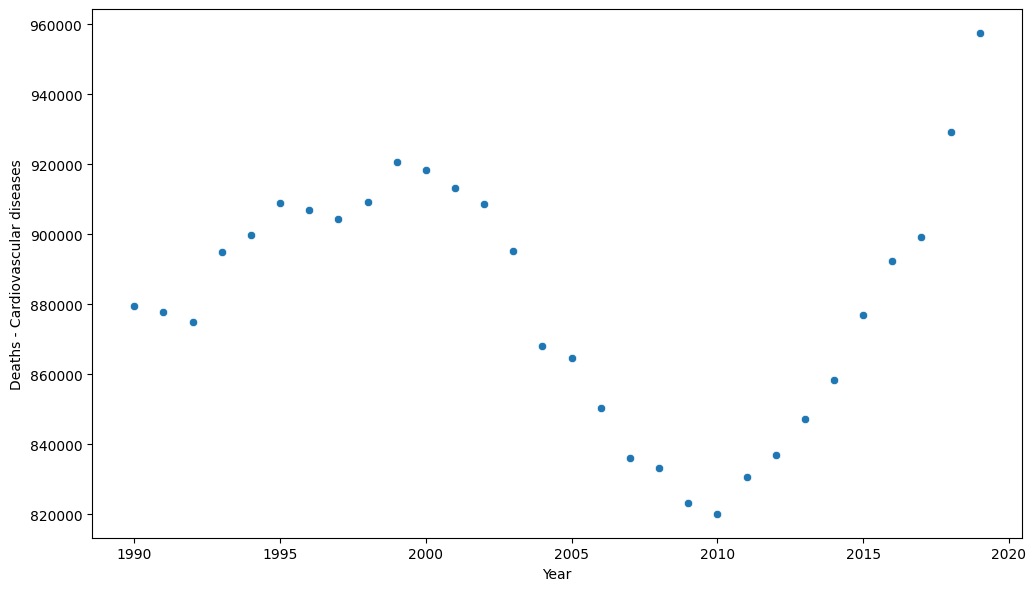

In [26]:
plt.figure(figsize = (12, 7), dpi = 100)
sns.scatterplot(data = df_am, x = 'Year', y = 'Deaths - Cardiovascular diseases')

Well... that's an interesting graph to say the least. I expected the graph to be either somewhat linear going up or somewhat linear going down but I did not see this coming. It seems that deaths by cardiovascular diseases was on an uptrend until around 2001 when it started decreasing and got as low as around 820,000 in 2010. From there though, it started increasing exponentially and as of 2019 is at around 960,000. What happened here that caused such a rapid growth in death?

One thing that may play a contribution is the sharp increase in obesity and older populations. However, why this results in a gain after 2010 is a bit confusing. The only thing I can say for sure is that cardiovascular deaths are on a significant rise and we need to find someway to reduce it like we did from 2001 to 2010.

Let's look at some other diseases now, do they exhibit a similar trend?

<AxesSubplot:xlabel='Year', ylabel="Deaths - Alzheimer's disease and other dementias">

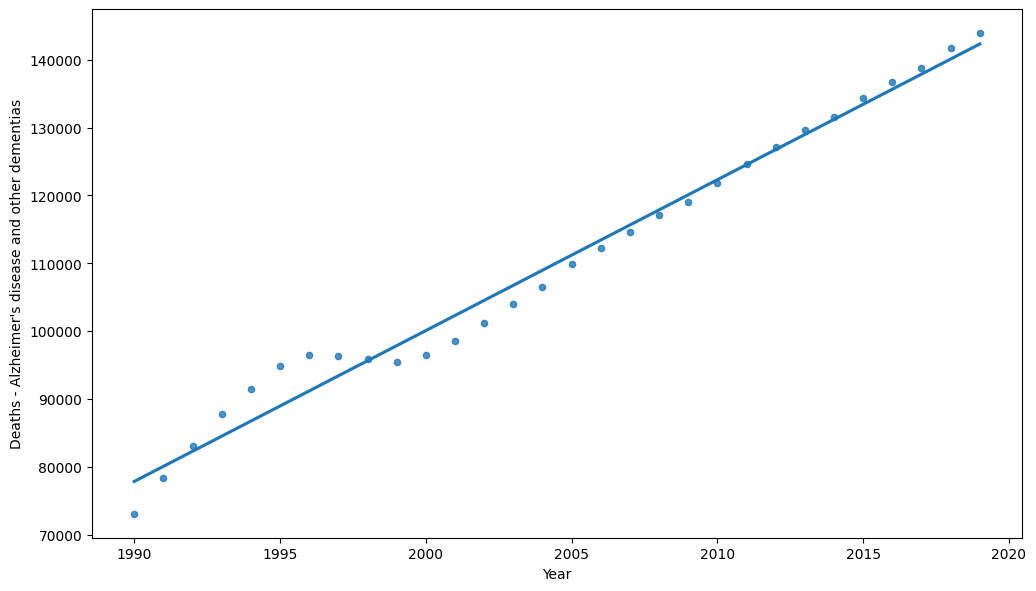

In [27]:
plt.figure(figsize = (12, 7), dpi = 100)
sns.regplot(data = df_am, x = 'Year', y = "Deaths - Alzheimer's disease and other dementias", scatter_kws={'s':20}, ci = None)

Alright well that's about what I expected for cardiovascular diseases when I first did the graph but it makes sense for Alzheimers to look like that as well. While Alzheimer's sadly cannot be predicted, there are factors that increase chances of a person getting the disease. These factors including older age, unhealthy lifestyle, obesity, alcohol, lack of exercise, lack of sleep, etc. Many of these factors are problems the average American has to deal with throughout life especially since we are one of the most obese countries in the world. 

<AxesSubplot:xlabel='Year', ylabel='Deaths - Digestive diseases'>

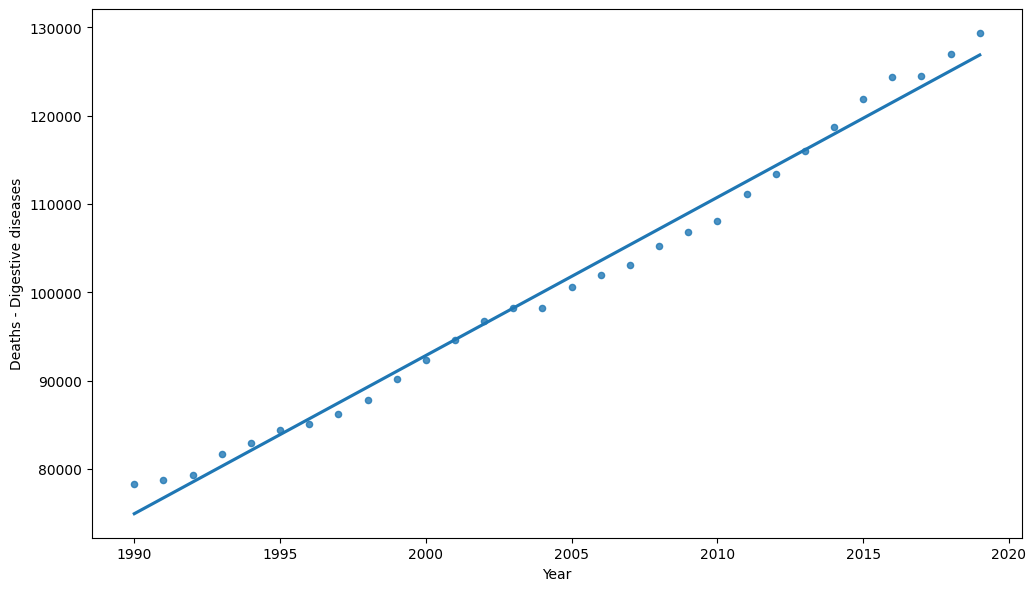

In [28]:
plt.figure(figsize = (12, 7), dpi = 100)
sns.regplot(data = df_am, x = 'Year', y = 'Deaths - Digestive diseases', scatter_kws={'s':20}, ci = None)

Again we see a fairly linear trend for deaths by disease, in this case Digestive Diseases. This includedes hemorrhoids, constipation, heartburn, cancer, irrtable bowel syndrome, etc. According to google, this is again mainly due to factors such as obesity, excessive alcohol, stress, and just about the same thing as the other diseases I've done for America. 

There's starting to be a pattern here where for many of these chronic diseases, they are significantly increasing in places like America due to an unhealthy lifestyle and longer lifespans. 

In [29]:
df_diseases = df_am.drop('Deaths - Cardiovascular diseases', axis = 1)
df_diseases = df_diseases.melt(id_vars = 'Year', value_vars = df_diseases.columns[df_diseases.columns.str.contains('disease')], var_name = 'Diseases', value_name = 'Deaths')
df_diseases.head()

,Year,Diseases,Deaths
0,2007,Deaths - Diarrheal diseases,9586.0
1,2008,Deaths - Diarrheal diseases,10287.0
2,2009,Deaths - Diarrheal diseases,10637.0
3,2010,Deaths - Diarrheal diseases,10928.0
4,2011,Deaths - Diarrheal diseases,11327.0


Text(0.5, 1.0, 'Deaths due to Diseases, separated by Year')

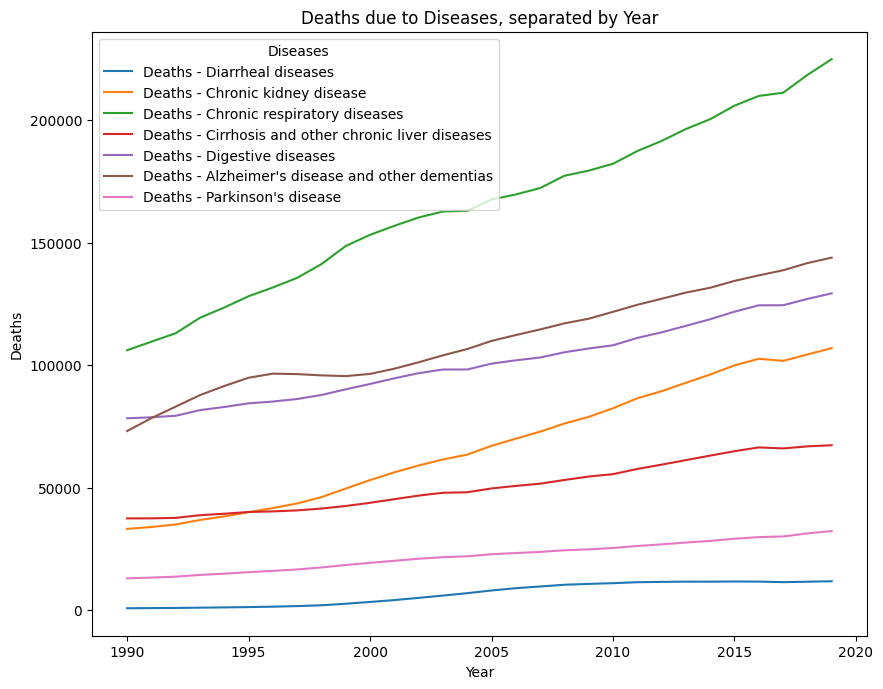

In [30]:
plt.figure(figsize = (10, 8), dpi = 100)
sns.lineplot(data = df_diseases, x = 'Year', y = 'Deaths', hue = 'Diseases')
plt.title('Deaths due to Diseases, separated by Year')

I am now starting to see why chronic diseases are such a huge issue in America. Every single chronic disease is getting worst and resulting in more deaths throughout America. According to the CDC the main causes are of course tobacco use, poor nutrition, lack of physical activity, and alcohol use. It's scary to see how many problems are resulting from factors that many of us can change but don't choose to for our own pleasures sake (not all people of course, this is especially hard for people who are poor). 

Okay lets move on from diseases and start looking at other causes of deaths in America. I'm going to first look at terrorist attacks since it is such a big representation in the media and usually gets a lot of attention.

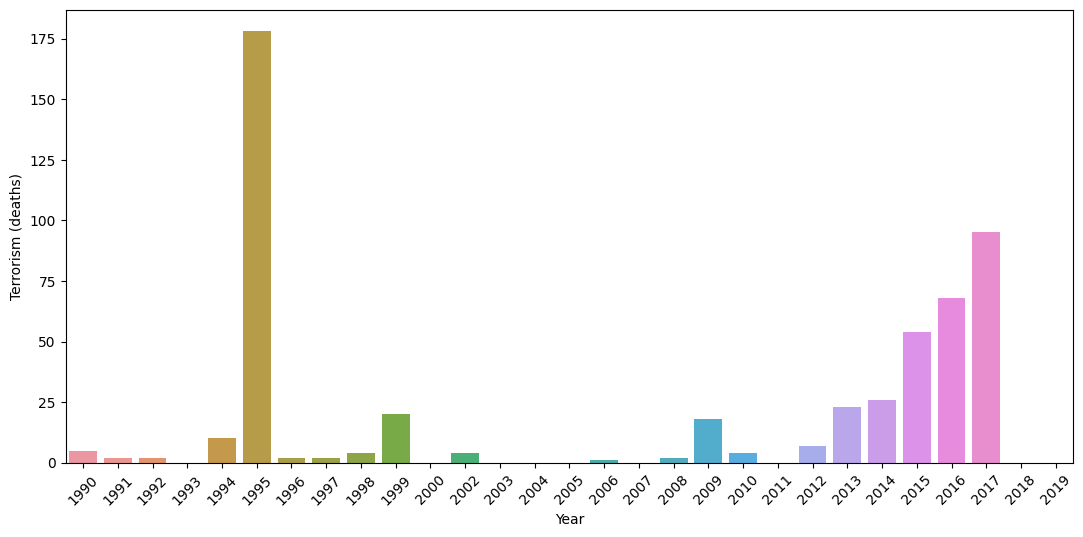

In [48]:
plt.figure(figsize = (13, 6), dpi = 100);
sns.barplot(data = df_am[df_am['Year'] != 2001], x = 'Year', y = 'Terrorism (deaths)',  ci = None)
plt.xticks(rotation = 45);

NOTE: I am not including 2001 as it very much takes over the dataset since it has more than 3000 deaths (peace be upon those who died). 

Thankfully, it seems as if there are very little terrorist attacks in the US, however as shown by the data, that number does seem to have increased during the recent years. However, most of these attacks are actually by right winged terrorists rather than outside attacks. Ironically, however, it seems that the media mainly portrays muslim extremists while there are more far right extremist attacks.

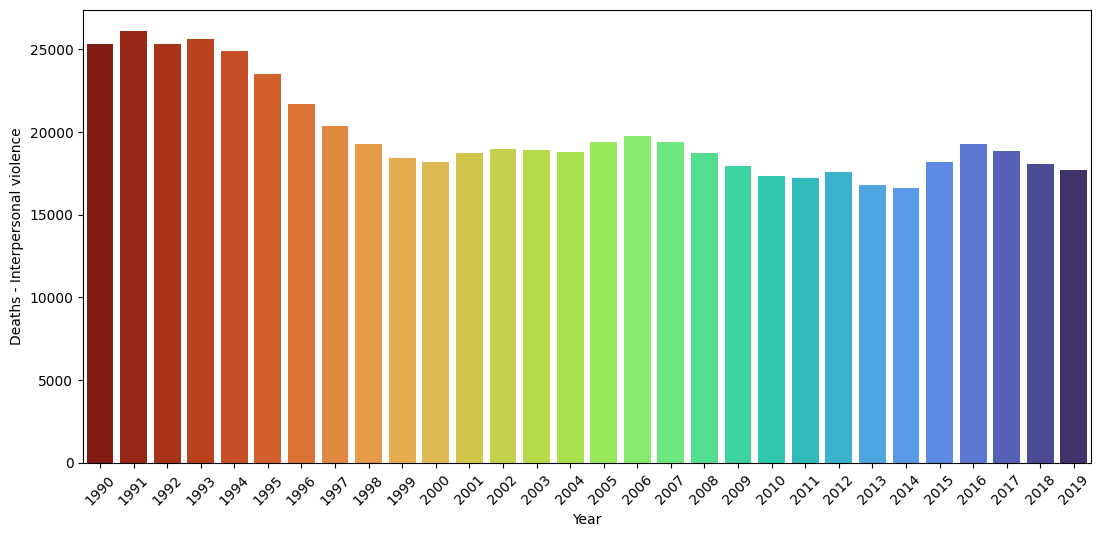

In [73]:
plt.figure(figsize = (13, 6), dpi = 100);
sns.barplot(data = df_am, x = 'Year', y = 'Deaths - Interpersonal violence', palette = 'turbo_r')
plt.xticks(rotation = 45);

The amount of deaths due to interpersonal violence is on a slight decrease but is still very high in the US. It's part of the 5 leading causes of deaths among teenagers in the US due to things like homicide.

One of the main things that causes interpersonal violence are things like alcohol, drugs, and guns.

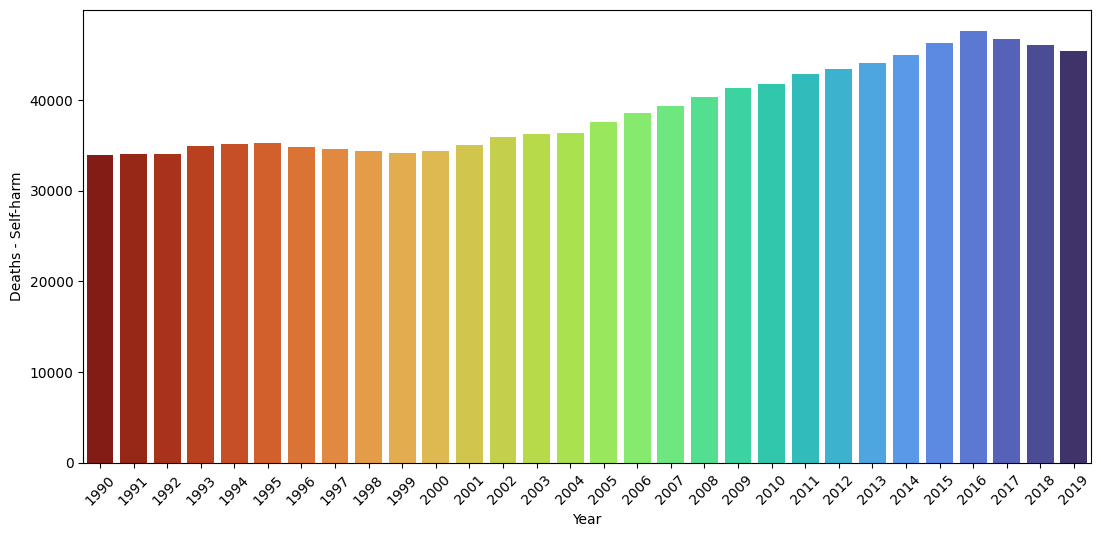

In [78]:
plt.figure(figsize = (13, 6), dpi = 100);
sns.barplot(data = df_am, x = 'Year', y = 'Deaths - Self-harm', palette = 'turbo_r')
plt.xticks(rotation = 45);

What seems to be even worst than homicides though is the amount of deaths caused by suicide which is currently the second leading cause of deaths among teenagers. In an almost expected take, the main causes of suicide are unhealthy lifestyle, mental disease/disorder, depression, and accidental (ex: substance or tobacco abuse).

It seems that based on the evidence above, America (and most likely many other developed countries) have a significant problem when it comes to chronic disease and violence. Both of these problems though come from a similar set of issues that usually end up leading to a death. These issues include living an unhealthy lifestyle, obesity, depression, alcoholic, drug/tobacco use, stress, lack of sleep. Note how many of the issues are correlated with each other and doing one can easily lead to another. 

As a society we have done a great job of moving on from deaths related to infection and War especially in more developed countries. However, now it seems we face a new problem,, one that is rarely ever shown on the media. Mental and physical health have become the disease of the 21st century as most deaths can be attributed back to a person not taking good care of themselves. I hope as time goes on we will start seeing the effects of bad mental/physical health on people and focus on the issue of improving people's lives so that they are less likely to develop chronic diseases or consider death as the only way out.

Until then, thank you for reading my notebook!